In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import pandas as pd
import PIL
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models

In [184]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [103]:
labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

In [192]:
IMG_SIZE = 180
BATCH = 32 

In [194]:
train_data_gen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_data_gen = ImageDataGenerator(rescale = 1./255)

train_generator = train_data_gen.flow_from_directory('data/images/train',
                                                    target_size = (IMG_SIZE, IMG_SIZE),
                                                    batch_size = BATCH,
                                                    color_mode = 'grayscale',
                                                    class_mode = 'categorical')

test_generator = test_data_gen.flow_from_directory('data/images/test',
                                                    target_size = (IMG_SIZE, IMG_SIZE),
                                                    batch_size = BATCH,
                                                    color_mode = 'grayscale',
                                                    class_mode = 'categorical')

Found 560 images belonging to 7 classes.
Found 140 images belonging to 7 classes.


In [197]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (180, 180, 1)))
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation = 'softmax'))


model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.0001, decay = 1e-6), metrics = ['accuracy'])

In [238]:
model_info = model.fit(train_generator,
                                steps_per_epoch = 560 // 64,
                                epochs = 120,
                                validation_data = test_generator,
                                validation_steps = 140 // 64)

Epoch 1/120
8/8 [==============================] - 39s 5s/step - loss: 1.8895 - accuracy: 0.2125 - val_loss: 1.8778 - val_accuracy: 0.3125
Epoch 2/120
8/8 [==============================] - 45s 6s/step - loss: 1.8438 - accuracy: 0.2383 - val_loss: 1.8601 - val_accuracy: 0.2188
Epoch 3/120
8/8 [==============================] - 43s 5s/step - loss: 1.8867 - accuracy: 0.2031 - val_loss: 1.8734 - val_accuracy: 0.2656
Epoch 4/120
8/8 [==============================] - 43s 5s/step - loss: 1.8589 - accuracy: 0.2070 - val_loss: 1.8373 - val_accuracy: 0.2812
Epoch 5/120
8/8 [==============================] - 41s 5s/step - loss: 1.8403 - accuracy: 0.2625 - val_loss: 1.8685 - val_accuracy: 0.1875
Epoch 6/120
8/8 [==============================] - 40s 5s/step - loss: 1.8980 - accuracy: 0.2250 - val_loss: 1.8589 - val_accuracy: 0.2500
Epoch 7/120
8/8 [==============================] - 41s 5s/step - loss: 1.9009 - accuracy: 0.1750 - val_loss: 1.8777 - val_accuracy: 0.2188
Epoch 8/120
8/8 [==========

8/8 [==============================] - 43s 5s/step - loss: 1.8281 - accuracy: 0.2539 - val_loss: 1.9086 - val_accuracy: 0.1562
Epoch 60/120
8/8 [==============================] - 40s 5s/step - loss: 1.8071 - accuracy: 0.2500 - val_loss: 1.8389 - val_accuracy: 0.2656
Epoch 61/120
8/8 [==============================] - 41s 5s/step - loss: 1.7917 - accuracy: 0.2625 - val_loss: 1.9629 - val_accuracy: 0.1406
Epoch 62/120
8/8 [==============================] - 43s 5s/step - loss: 1.8395 - accuracy: 0.2656 - val_loss: 1.8099 - val_accuracy: 0.2656
Epoch 63/120
8/8 [==============================] - 43s 5s/step - loss: 1.8208 - accuracy: 0.2578 - val_loss: 1.8666 - val_accuracy: 0.2656
Epoch 64/120
8/8 [==============================] - 41s 5s/step - loss: 1.8116 - accuracy: 0.2417 - val_loss: 1.7953 - val_accuracy: 0.2656
Epoch 65/120
8/8 [==============================] - 40s 5s/step - loss: 1.8166 - accuracy: 0.2292 - val_loss: 1.8518 - val_accuracy: 0.2031
Epoch 66/120
8/8 [===============

8/8 [==============================] - 43s 5s/step - loss: 1.7599 - accuracy: 0.2891 - val_loss: 1.9277 - val_accuracy: 0.2344
Epoch 118/120
8/8 [==============================] - 44s 6s/step - loss: 1.7783 - accuracy: 0.2383 - val_loss: 1.8356 - val_accuracy: 0.2500
Epoch 119/120
8/8 [==============================] - 41s 5s/step - loss: 1.7522 - accuracy: 0.3125 - val_loss: 1.7791 - val_accuracy: 0.2812
Epoch 120/120
8/8 [==============================] - 41s 5s/step - loss: 1.7465 - accuracy: 0.3208 - val_loss: 1.9958 - val_accuracy: 0.1719


In [239]:
test_loss, test_acc = model.evaluate(test_generator)

print('\nTest Accuracy:', test_acc)

5/5 [==============================] - 5s 865ms/step - loss: 1.9052 - accuracy: 0.2143

Test Accuracy: 0.2142857164144516


In [200]:
preds = model.predict(test_generator)

predicted_labels = np.argmax(preds, axis = 1)

5/5 [==============================] - 5s 860ms/step


In [201]:
final_predictions = [labels[i] for i in predicted_labels]

In [367]:
imageX = cv2.imread('data/IMGX.JPG')
imageX = cv2.resize(imageX, (IMG_SIZE, IMG_SIZE))
imageX = cv2.cvtColor(imageX, cv2.COLOR_RGB2GRAY)
imageX = np.expand_dims(imageX, axis = 0)

In [368]:
predicted_label = np.argmax(model.predict(imageX))

1/1 [==============================] - 0s 77ms/step


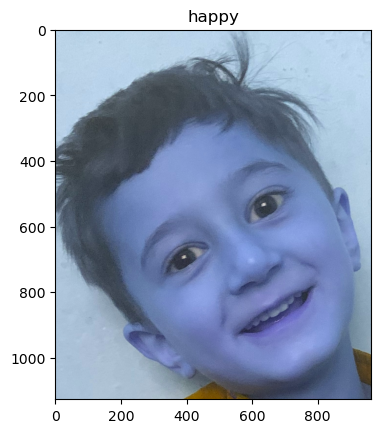

In [372]:
fig, axes = plt.subplots(nrows = 1, ncols = 1)
imgg = cv2.imread('data/IMGX.JPG')

axes.set_title(labels[predicted_label])
plt.imshow(imgg)